# Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].nunique() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
# data['ext_col'].value_counts()# 11 -> nao se sabe
# data['int_col'].value_counts() # 98 -> nao se sabe
# for preco in data['price']: # tudo certo
#     if not isinstance(preco, int):
#         print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

# verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.info()

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [ ]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

#### Clean title

In [ ]:
p['clean_title'] = p['clean_title'].fillna('No')

### novos atributos (derivações)

#### T2

In [ ]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()
# p['T2'].unique()

#### Categoria_ET (engine + transmission)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 5

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria_ET'] = kmeans.labels_
import matplotlib.pyplot as plt

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria_ET'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria_ET')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

#Mostrar o gráfico
plt.show()

p['Categoria_ET'].unique()


In [ ]:
p.columns

In [ ]:
p.info()

In [ ]:
p['Categoria_ET'] = p['Categoria_ET'].astype('category')

#### Categoria Marca

In [ ]:
frequencias = p['brand'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Marca'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Marca'
    else:
        return 'Média Frequência Marca'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Marca'] = p['brand'].map(frequencias.apply(categorizar))

p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')
p['Categoria_Marca'].value_counts()

#### Categoria Modelo

In [ ]:
frequencias = p['model'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Modelo'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Modelo'
    else:
        return 'Média Frequência Modelo'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Modelo'] = p['model'].map(frequencias.apply(categorizar))
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')
p['Categoria_Modelo'].value_counts()
p['Categoria_Modelo'].unique()

In [ ]:
p.columns

#### normalidade das novas colunas (numéricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Lista das colunas numéricas que você deseja analisar
colunas_numericas = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2']

num_colunas = len(colunas_numericas)
fig, axs = plt.subplots(2, num_colunas, figsize=(15, 8))
print(f'Teste de Shapiro-Wilk: \n')

# Iterar sobre as colunas numéricas e plotar os gráficos em cada subplot
for i, coluna in enumerate(colunas_numericas):
    # Histograma
    sns.histplot(p[coluna], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{coluna}')
    
    # Gráfico QQ
    stats.probplot(p[coluna], dist="norm", plot=axs[1, i])
    axs[1, i].set_title(f'QQ-plot')
 
    # Teste de Shapiro-Wilk
    stat, pv = stats.shapiro(p[coluna])
    print(f'{coluna}:')
    print(f'Valor p: {pv}')
    if pv > 0.05:
        print('Não podemos rejeitar a hipótese nula - A distribuição parece normal.')
    else:
        print('Rejeita-se a hipótese nula -> a distribuição não segue o modelo normal.')
    
plt.tight_layout()
plt.show()


como se pode observar, nenhum dos novos atributos (numéricos possuem distribuição normal)

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.info()

In [ ]:
data1.head()

### NULL's substitution

In [ ]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)

#### Categoria cor interna

In [ ]:
frequencias = data1['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_IntCol'] = data1['int_col'].map(frequencias.apply(categorizar))
data1['Categoria_IntCol'] = data1['Categoria_IntCol'].astype('category')
data1['Categoria_IntCol'].value_counts()

In [ ]:
data1['ext_col'].unique()

##### Categoria cor externa

In [ ]:
frequencias = data1['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_ExtCol'] = data1['ext_col'].map(frequencias.apply(categorizar))
data1['Categoria_ExtCol'] = data1['Categoria_ExtCol'].astype('category')
data1['Categoria_ExtCol'].value_counts()
data1['Categoria_ExtCol'].unique()

#### Correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data1.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)


In [ ]:
#va's categóricas
categorical_columns = data1.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data1[column], data1['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Outlier por IQR -> V.a Numéricas

In [ ]:
outlier_indices_dict = {}

# Variáveis Numéricas
for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))

    outlier_indices_dict[column] = data1.loc[~outlier_conditional].index
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

###### O número de válvulas têm muito pouca correlação com o preço -> N utiliza-se essa coluna para os cenários!
###### Remove-se os 6 registros da capacidade do motor e os 57 com num de cilindros e 376 do T2


##### Remover registros com outliers (cujo correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data1_s_out = data1.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data1_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data1_s_out))

In [ ]:
data1.to_csv('subset_1.csv', index=False) # sem normalizar com outliers
data1_s_out.to_csv('subset_1_s_out.csv', index=False) # sem normalizar sem outliers

# subset 2

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data2=p

In [ ]:
p.columns

### NULL's substitution

### Fuel Type

In [ ]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### accident + engine + transmission + ex_col + int_col

In [ ]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Categoria cor interna

In [ ]:
frequencias = data2['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência int_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência int_col'
    else:
        return 'Média Frequência int_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_IntCol'] = data2['int_col'].map(frequencias.apply(categorizar))
data2['Categoria_IntCol'] = data2['Categoria_IntCol'].astype('category')
data2['Categoria_IntCol'].value_counts()

#### Categoria cor externa

In [ ]:
frequencias = data2['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    else:
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_ExtCol'] = data2['ext_col'].map(frequencias.apply(categorizar))
data2['Categoria_ExtCol'] = data2['Categoria_ExtCol'].astype('category')
data2['Categoria_ExtCol'].value_counts()

### Correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data2.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

In [ ]:
#va categorica
categorical_columns = data2.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data2[column], data2['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Outlier por IQR -> va.'s Numéricas

In [ ]:
# Variáveis Numéricas
for column in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data2[column] > Q1 - 1.5*IQR) & (data2[column] < Q3 + 1.5*IQR))
    outlier_indices_dict[column] = data2.loc[~outlier_conditional].index
    
    num_outliers = len(data2[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

##### Remover registros com outliers (cuja correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data2_s_out = data2.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data2_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data2_s_out))

In [ ]:
data2.to_csv('subset_2.csv', index=False) # sem normalizar com outliers
data2_s_out.to_csv('subset_2_s_out.csv', index=False) # sem normalizar sem outliers

In [ ]:
data2.info()

# MODELAÇÃO
### Como subset 1 é muito parecido com subset 2, só vamos utilizar o subset 1

In [ ]:
import pandas as pd
subset_1=pd.read_csv('subset_1.csv')
subset_1_s_out=pd.read_csv('subset_1_s_out.csv')
pd.set_option('display.max_rows', None)

In [ ]:
subset_1.columns

## Cenário 1 -> todas as variáveis (sem categorias extras (redundância))
#### - (se for usar todas as variáveis não da para normalizar os dados)

### com outliers

In [ ]:
X1 = subset_1[['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']]
y1 = subset_1['price'] 
# definir amostra treino e teste
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#### label logaritmizada (preço) + normalização

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X1.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X1.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(handle_unknown="ignore"), features_cat),
)

# normalizar
X1_train_norm = preprocessor.fit_transform(X1_train)
X1_test_norm = preprocessor.transform(X1_test)

# logaritmizar
y1_train_log = np.log(y1_train)
y1_test_log = np.log(y1_test)

### sem outliers

In [28]:
X1out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']] # tinha T2 » retirei...
y1out = subset_1_s_out['price'] 

from sklearn.model_selection import train_test_split
X1out_train, X1out_test, y1out_train, y1out_test = train_test_split(X1out, y1out, test_size=0.2, random_state=42)

#### normalizados e label logaritmizada

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X1out.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X1out.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(handle_unknown="ignore"), features_cat),
)

# normalizar
X1out_train_norm = preprocessor.fit_transform(X1out_train) 
X1out_test_norm = preprocessor.transform(X1out_test)
# logaritmizar
y1out_train_log = np.log(y1out_train) # »»» mudei y1_train para y1out_train «««
y1out_test_log = np.log(y1out_test) # »»» y1_train para y1out_test «««

# Cenário 2 (todas as variáveis (categorias))

#### com outliers

In [ ]:
X2 = subset_1[['model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'Categoria_ET', 'Categoria_Marca', 'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol']]
y2 = subset_1['price'] 


from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#### Normalização + label logaritmizada

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X2.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X2.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

X2_train_norm = preprocessor.fit_transform(X2_train)
X2_test_norm = preprocessor.transform(X2_test)
y2_train_log = np.log(y2_train)
y2_test_log = np.log(y2_test)

#### sem outlier

In [ ]:
X2out = subset_1_s_out[['model_year','milage','fuel_type','accident','clean_title','Categoria_ET','Categoria_Marca','Categoria_Modelo','Categoria_IntCol','Categoria_ExtCol']]  
y2out = subset_1_s_out['price'] 

from sklearn.model_selection import train_test_split
X2out_train, X2out_test, y2out_train, y2out_test = train_test_split(X2out, y2out, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X2out.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X2out.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# normalizar
X2out_train_norm = preprocessor.fit_transform(X2out_train) 
X2out_test_norm = preprocessor.transform(X2out_test)
# logaritmizar
y2out_train_log = np.log(y2out_train) # »»» mudei y1_train para y1out_train «««
y2out_test_log = np.log(y2out_test) # »»» y1_train para y1out_test «««

## Cenário 3 (ao olho, características do carro novo sem influência do condutor)

#### com outliers

In [ ]:
X3=subset_1[['Potencia','Capacidade_Motor','Numero_Cilindros','T2']]
y3=subset_1['price']

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

#### normalização + label logaritmizada

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X3.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X3.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# normalizar
X3_train_norm = preprocessor.fit_transform(X3_train)

X3_test_norm = preprocessor.transform(X3_test)

# logaritmizar
y3_train_log = np.log(y3_train)
y3_test_log = np.log(y3_test)

#### sem outlier

In [ ]:
X3out = subset_1_s_out[['Potencia','Capacidade_Motor','Numero_Cilindros','T2']] 
y3out = subset_1_s_out['price'] 

from sklearn.model_selection import train_test_split
X3out_train, X3out_test, y3out_train, y3out_test = train_test_split(X3out, y3out, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

features_num=X3out.select_dtypes(include=['int64','float64']).columns.tolist()
features_cat=X3out.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# normalizar
X3out_train_norm = preprocessor.fit_transform(X3out_train)

X3out_test_norm = preprocessor.transform(X3out_test)

# logaritmizar
y3out_train_log = np.log(y3out_train)
y3out_test_log = np.log(y3out_test)

## Cenário 4 (ao olho, características do carro com influência do condutor)

In [ ]:
[['brand','model','model_year','milage','fuel_type','ex_col','int_col','accident','clean_title']]

## Cenário 5 = cenário 4 subsituindo 'Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2' por 'Categoria_ET'

In [ ]:
from imblearn.over_sampling import SMOTE

# Passo 1: Instanciar o Objeto SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Passo 2: Aplicar o SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Passo 3: Verificar o Resultado
print("Tamanho do conjunto de dados antes do SMOTE:", len(X), len(y))
print("Tamanho do conjunto de dados após o SMOTE:", len(X_resampled), len(y_resampled))

# previsões para cenário 1

### Separar Data / Treinar e Avaliar Algoritmos

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
import shap

In [ ]:
print("Shape of X1_train:", X1_train.shape)
print("Shape of X1_test:", X1_test.shape)
print("Shape of y1_train:", y1_train.shape)
print("Shape of y1_test:", y1_test.shape)
# com log
print("Shape of y1_train_log:", y1_train_log.shape)
print("Shape of y1_test_log:", y1_test_log.shape)

# os tests estão com 642 rows
# treino com 2565

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
# Cenario 1 -> com outliers
# model.fit(X1_train_norm, y1_train) # sem log
# model.fit(X1_train_norm, y1_train_log)
# Cenario 1 -> sem outliers
# model.fit(X1out_train_norm, y1out_train)
model.fit(X1out_train_norm, y1out_train_log)

# Cenario 2 -> com outliers
# model.fit(X2_train_norm, y2_train_log)

In [ ]:
# PREDICT 
# Cenario 1 -> com outliers
# pred0 = model.predict(X1_test_norm)
# Cenario 1 -> sem outliers
pred0 = model.predict(X1out_test_norm)

# cenario 2 -> com outliers
# pred0 = model.predict(X2_test_norm)

In [ ]:
preprocessor

In [ ]:
# Reverter logaritmo dos valores preditos
pred0_orig_scale = np.exp(pred0)

# Calcular métricas usando valores não normalizados e não logaritmizados
# cenario 1 -> com outliers
reg_metrics0 = RegressionMetrics(np.exp(y1out_test_log), pred0_orig_scale)
# reg_metrics0 = RegressionMetrics(y1_test, pred0)

# cenario 2 -> com outliers
# reg_metrics0 = RegressionMetrics(np.exp(y2_test_log), pred0_orig_scale)

reg_metrics0.plot()

### random forest

In [ ]:
# train and predict with Random Forest Regressor
RF = RandomForestRegressor()

# Cenario 1 -> com outliers
# RF.fit(X1_train_norm, y1_train_log)
# RF.fit(X1_train_norm, y1_train) # sem log
# pred = RF.predict(X1_test_norm)

# Cenario 1 -> sem outliers
# RF.fit(X1out_train_norm, y1out_train) # sem log
RF.fit(X1out_train_norm, y1out_train_log)
pred = RF.predict(X1out_test_norm)

# Cenario 2 -> com outliers
# RF.fit(X2_train_norm, y2_train_log)
# pred = RF.predict(X2_test_norm)

In [ ]:
# Regression metrics for Random Forest

# Reverter logaritmo dos valores preditos
pred_orig_scale = np.exp(pred)

# Calcular métricas usando valores não normalizados e não logaritmizados
# cenario 1 -> com outliers
reg_metrics = RegressionMetrics(np.exp(y1out_test_log), pred_orig_scale)
# reg_metrics = RegressionMetrics(y1out_test, pred) # sem log

# cenario 2 -> com outliers
# reg_metrics = RegressionMetrics(np.exp(y2_test_log), pred_orig_scale)

reg_metrics.plot()

### ada boost

In [ ]:
# train and predict with Adaboost Regressor
AR = AdaBoostRegressor()
# Cenario 1 -> com outliers 
# AR.fit(X1_train_norm, y1_train_log)
# AR.fit(X1_train_norm, y1_train) # sem log
# pred2 = AR.predict(X1_test_norm)
# Cenario 1 -> sem outliers 
AR.fit(X1out_train_norm, y1out_train_log)
# AR.fit(X1out_train_norm, y1out_train) # sem log
pred2 = AR.predict(X1out_test_norm)

# Cenario 2 -> com outliers 
# AR.fit(X2_train_norm, y2_train_log)
# pred2 = AR.predict(X2_test_norm)

In [ ]:
# Regression metrics for Adaboost


# Reverter logaritmo dos valores preditos
pred2_orig_scale = np.exp(pred2)
# Calcular métricas usando valores não normalizados e não logaritmizados

# Cenario 1 -> com outliers 
# reg_metrics2 = RegressionMetrics(np.exp(y1_test_log), pred2_orig_scale)
# reg_metrics2 = RegressionMetrics(y1_test, pred2)

# Cenario 1 -> sem outliers 
reg_metrics2 = RegressionMetrics(np.exp(y1out_test_log), pred2_orig_scale)
# reg_metrics2 = RegressionMetrics(y1out_test, pred2)

# Cenario 2 -> com outliers 
# reg_metrics2 = RegressionMetrics(np.exp(y2_test_log), pred2_orig_scale)

reg_metrics2.plot()

### decision tree

In [ ]:
DT = tree.DecisionTreeRegressor(max_depth=3, random_state=42)

# Cenario 1 -> com outliers 
# DT.fit(X1_train_norm, y1_train_log)
# DT.fit(X1_train_norm, y1_train) # sem log
# pred3 = DT.predict(X1_test_norm)

# Cenario 1 -> sem outliers 
DT.fit(X1out_train_norm, y1out_train_log)
# DT.fit(X1out_train_norm, y1out_train) # sem log
pred3 = DT.predict(X1out_test_norm)

# Cenario 2 -> com outliers 
# DT.fit(X2_train_norm, y2_train_log)
# pred3 = DT.predict(X2_test_norm)

In [ ]:
# Regression metrics for Decision Tree
# reg_metrics3 = RegressionMetrics(y1_test, pred3)
# reg_metrics3 = RegressionMetrics(y1_test_log, pred3)

# Reverter logaritmo dos valores preditos
pred3_orig_scale = np.exp(pred3)

# Calcular métricas usando valores não normalizados e não logaritmizados
# Cenario 1 -> com outliers 
# reg_metrics3 = RegressionMetrics(np.exp(y1_test_log), pred3_orig_scale)
# reg_metrics3 = RegressionMetrics(y1_test, pred3)

# Cenario 1 -> sem outliers 
reg_metrics3 = RegressionMetrics(np.exp(y1out_test_log), pred3_orig_scale)
# reg_metrics3 = RegressionMetrics(y1out_test, pred3)

# Cenario 2 -> com outliers 
# Calcular métricas usando valores não normalizados e não logaritmizados
# reg_metrics3 = RegressionMetrics(np.exp(y2_test_log), pred3_orig_scale)

reg_metrics3.plot()

In [ ]:
plt.figure(figsize=(20, 7))
tree.plot_tree(
    # Cenario 2 -> com outliers 
    DT, feature_names=X2_train.columns, filled=True, rounded=True
)
plt.plot()

### redes neurais

#### dropout + regularização

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

# Parametros escolhidos pelo greedy
modelo = Sequential()
# Cenario 1 -> com outliers 
# modelo.add(Dense(units=32, activation='relu', input_dim=X1_train_norm.shape[1]))
# Cenario 1 -> sem outliers 
modelo.add(Dense(units=32, activation='relu', input_dim=X1out_train_norm.shape[1]))
# Cenario 2 -> com outliers 
# modelo.add(Dense(units=32, activation='relu', input_dim=X2_train_norm.shape[1]))
modelo.add(Dropout(0.3))  # Dropout para reduzir overfitting
modelo.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
modelo.add(Dense(units=1, activation='linear'))

# Treinando a rede neural com mais épocas
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
# Cenario 1 -> com outliers 
# resultado = modelo.fit(X1_train_norm, y1_train_log, epochs=500, batch_size=32, validation_data=(X1_test_norm, y1_test_log))
# resultado = modelo.fit(X1_train_norm, y1_train, epochs=500, batch_size=32, validation_data=(X1_test_norm, y1_test))
# pred4 = modelo.predict(X1_test_norm)
# Cenario 1 -> sem outliers 
resultado = modelo.fit(X1out_train_norm, y1out_train_log, epochs=500, batch_size=32, validation_data=(X1out_test_norm, y1out_test_log))
# resultado = modelo.fit(X1out_train_norm, y1out_train, epochs=500, batch_size=32, validation_data=(X1out_test_norm, y1out_test))
pred4 = modelo.predict(X1out_test_norm)

# Cenario 2 -> com outliers 
# resultado = modelo.fit(X2_train_norm, y2_train_log, epochs=500, batch_size=32, validation_data=(X2_test_norm, y2_test_log))
# pred4 = modelo.predict(X2_test_norm)

#Plotando gráfico do histórico de treinamento
import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [ ]:
# metrics redes neurais

# Reverter logaritmo dos valores preditos
pred4_orig_scale = np.exp(pred4)

# Calcular métricas usando valores não normalizados e não logaritmizados
# Cenario 1 -> com outliers 
# reg_metrics4 = RegressionMetrics(np.exp(y1_test_log.ravel()), pred4_orig_scale.ravel())
# reg_metrics4 = RegressionMetrics(y1_test.ravel(), pred4.ravel())
# Cenario 1 -> sem outliers 
reg_metrics4 = RegressionMetrics(np.exp(y1out_test_log.ravel()), pred4_orig_scale.ravel())
# reg_metrics4 = RegressionMetrics(y1out_test.ravel(), pred4.ravel())

# Cenario 2 -> com outliers 
# reg_metrics4 = RegressionMetrics(np.exp(y2_test_log.ravel()), pred4_orig_scale.ravel())

reg_metrics4.plot()

#### greedy search -> otimização de parâmetros

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Função para construir o modelo Keras
def create_model(units1=64, units2=32, dropout_rate=0.5, kernel_regularizer=0.01):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_dim=X1_train_norm.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

# Definindo os parâmetros a serem otimizados
param_grid = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.3, 0.5, 0.7],
    'kernel_regularizer': [0.001, 0.01, 0.1]
}

# Realizando a pesquisa em grade
grid_search_results = []

for units1 in param_grid['units1']:
    for units2 in param_grid['units2']:
        for dropout_rate in param_grid['dropout_rate']:
            for kernel_regularizer in param_grid['kernel_regularizer']:
                model = create_model(units1=units1, units2=units2, dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer)
                history = model.fit(X1_train_norm, y1_train_log, epochs=20, batch_size=32, verbose=0, validation_split=0.2, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
                val_loss = history.history['val_loss'][-1]
                grid_search_results.append({
                    'units1': units1,
                    'units2': units2,
                    'dropout_rate': dropout_rate,
                    'kernel_regularizer': kernel_regularizer,
                    'val_loss': val_loss
                })

# Encontrando os melhores parâmetros
best_params = min(grid_search_results, key=lambda x: x['val_loss'])

# Imprimindo os resultados
print("Melhores parâmetros encontrados: ", best_params)

## comparação dos resultados

In [ ]:
# Regressão deviation and accuracy values (for custom visualization)
RG_dev = reg_metrics0.deviation_
RG_acc = reg_metrics0.accuracy_

# Random Forest deviation and accuracy values (for custom visualization)
RF_dev = reg_metrics.deviation_
RF_acc = reg_metrics.accuracy_
# Adaboost deviation and accuracy values (for custom visualization)
AR_dev = reg_metrics2.deviation_
AR_acc = reg_metrics2.accuracy_
# Decision Tree deviation and accuracy values (for custom visualization)
DT_dev = reg_metrics3.deviation_
DT_acc = reg_metrics3.accuracy_

RN_dev=reg_metrics4.deviation_
RN_acc=reg_metrics4.accuracy_

In [ ]:
# REC curve - comparison of models
fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
plt.plot(
    RG_dev,
    RG_acc,
    color="purple",
    ls="--",
    lw=2,
    label="Regression={}".format(round(reg_metrics.auc_rec_, 3)),
)
plt.plot(
    RF_dev,
    RF_acc,
    color="royalblue",
    ls="--",
    lw=2,
    label="Random Forest={}".format(round(reg_metrics.auc_rec_, 3)),
)
plt.plot(
    AR_dev,
    AR_acc,
    color="darkorange",
    ls="-",
    lw=2,
    label="AdaBoost={}".format(round(reg_metrics2.auc_rec_, 3)),
)
plt.plot(
    DT_dev,
    DT_acc,
    color="red",
    ls="-",
    lw=2,
    label="DecisionTree={}".format(round(reg_metrics3.auc_rec_, 3)),
)
plt.plot(
    RN_dev,
    RN_acc,
    color="green",
    ls="-",
    lw=2,
    label="NeuralNet={}".format(round(reg_metrics4.auc_rec_, 3)),
)
plt.legend(loc=4)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.xlabel("Deviation")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
metrics = pd.concat(
    [
        reg_metrics0.get_metrics(),
        reg_metrics.get_metrics(),
        reg_metrics2.get_metrics(),
        reg_metrics3.get_metrics(),
        reg_metrics4.get_metrics(),
    ]
)
metrics.index = ["Regression","RandomForest", "AdaBoost", "DecisionTree","Neural Net"]
metrics

## classificação

              precision    recall  f1-score   support

        Alto       0.46      0.43      0.44        56
       Baixo       0.69      0.72      0.70       230
        Luxo       0.65      0.44      0.53        34
 Muito Baixo       0.52      0.52      0.52        61
       Médio       0.63      0.65      0.64       174

    accuracy                           0.63       555
   macro avg       0.59      0.55      0.57       555
weighted avg       0.63      0.63      0.63       555



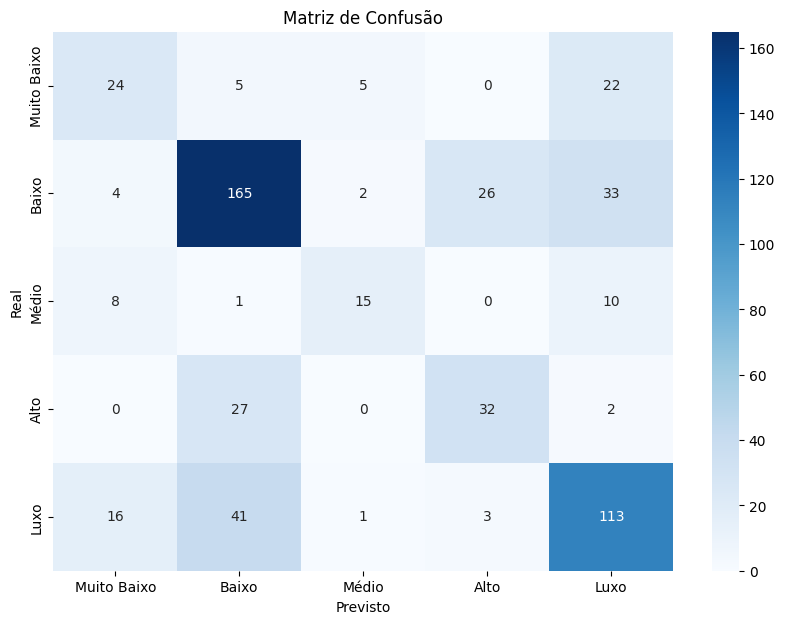

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# cenário 1
# X1 = subset_1[['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']]
# y1 = subset_1['price']
X1out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']] # tinha T2 » retirei...
y1out = subset_1_s_out['price'] 

bins = [0, 10000, 30000, 60000, 100000, float('inf')]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']

# cenário 1
# y1 = pd.cut(y1, bins=bins, labels=labels)
y1out = pd.cut(y1out, bins=bins, labels=labels)

# divisão em treino e teste
# cenário 1
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1out_train, X1out_test, y1out_train, y1out_test = train_test_split(X1out, y1out, test_size=0.2, random_state=42)# preços em categorias

# Identificando tipos de dados
# cenário 1
# features_num = X1.select_dtypes(include=['int64', 'float64']).columns.tolist()
# features_cat = X1.select_dtypes(include=['object', 'category']).columns.tolist()
features_num = X1out.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_cat = X1out.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessamento: escalonamento e codificação
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(handle_unknown="ignore"), features_cat),
)

# cenário 1
# X1_train_norm = preprocessor.fit_transform(X1_train)
# X1_test_norm = preprocessor.transform(X1_test)
X1out_train_norm = preprocessor.fit_transform(X1out_train)
X1out_test_norm = preprocessor.transform(X1out_test)

clf = DecisionTreeClassifier(random_state=42)
# cenário 1
# clf.fit(X1_train_norm, y1_train)
clf.fit(X1out_train_norm, y1out_train)

# cenário 1
# y_pred = clf.predict(X1_test_norm)
y_pred = clf.predict(X1out_test_norm)


# cenário 1
# print(classification_report(y1_test, y_pred))
# cm=confusion_matrix(y1_test, y_pred)
print(classification_report(y1out_test, y_pred))
cm=confusion_matrix(y1out_test, y_pred)
# matriz de confusão 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


# plt.figure(figsize=(20,10)) # árvore
# plot_tree(clf, feature_names=preprocessor.get_feature_names_out(), class_names=labels, filled=True, rounded=True, fontsize=12)
# plt.show()

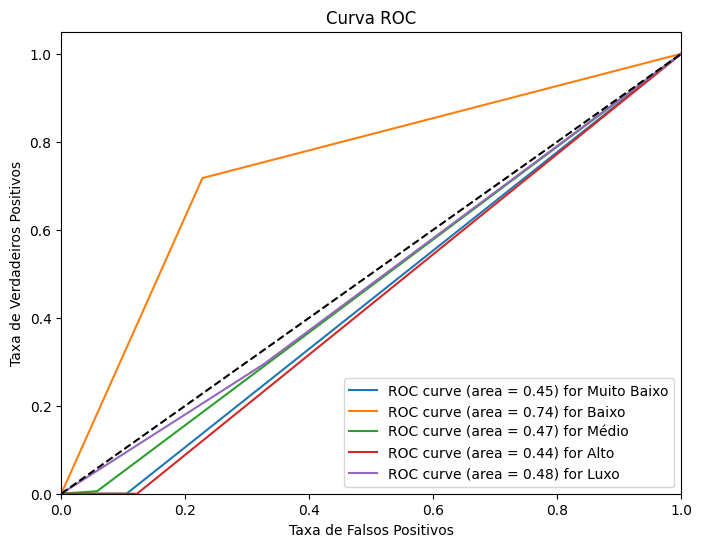

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Probabilidades previstas para cada classe
# cenário 1
# y_score = clf.predict_proba(X1_test_norm)
y_score = clf.predict_proba(X1out_test_norm)

# Binarizando as classes
# cenário 1
# y_test_bin = label_binarize(y1_test, classes=labels)
y_test_bin = label_binarize(y1out_test, classes=labels)

# Calculando a curva ROC e a área sob a curva para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando a curva ROC para cada classe
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {labels[i]}')

plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
